<a href="https://colab.research.google.com/github/armandordorica/Twitter_Sentiment_Analysis/blob/master/Amazon_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Refs: 
https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/ 

https://github.com/deshpandenu/Time-Series-Forecasting-of-Amazon-Stock-Prices-using-Neural-Networks-LSTM-and-GAN-/blob/master/Notebook%202_%20Stock%20Market%20Analysis%20using%20LSTM(Vanilla)-how%20good%20is%20a%20LSTM%20at%20predicting%20price%20movement.ipynb

https://www.datacamp.com/community/tutorials/lstm-python-stock-market


In [1]:
!pip install tensorflow==1.14

     |████████████████████████████████| 109.2MB 52kB/s 
     |████████████████████████████████| 491kB 50.4MB/s 
     |████████████████████████████████| 3.2MB 41.5MB/s 
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2.2.0:
      Successfully uninstalled tensorboard-2.2.0
  Found existing installation: tensorflow 2.2.0rc2
    Uninstalling tensorflow-2.2.0rc2:
      Successfully uninstalled tensorflow-2.2.0rc2


In [2]:

#import libraries
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json 
import os
import numpy as np
import tensorflow as tf 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a f

In [3]:
from google.colab import files
uploaded = files.upload()

In [0]:
df = pd.read_csv('AMZN.csv')

In [5]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


### **MinMaxScaler**
Transform features by scaling each feature to a given range.

This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [0]:
df_close = df['Close']
df_close = df_close.values.reshape(5760,1)

In [0]:
df_dates = df['Date']

In [0]:
df_dates = np.array(df_dates)

In [0]:
df_close = np.array(df_close)

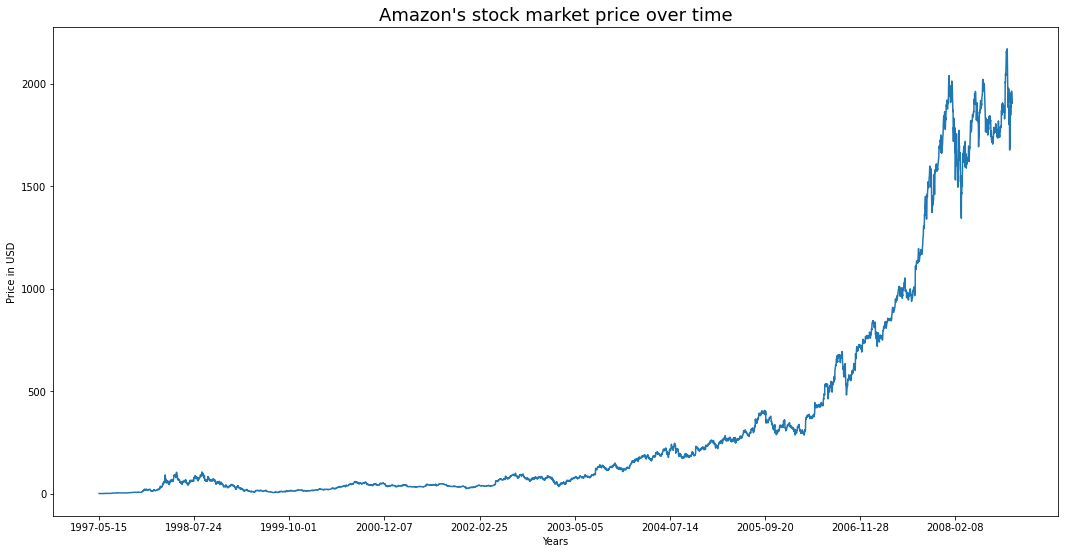

In [10]:
import matplotlib.dates as mdates

plt.figure(figsize = (18,9))
plt.plot(df_dates, df_close)

plt.xticks(np.arange(0,len(df),600), df['Date'][0:len(df):300])

plt.ylabel('Price in USD')
plt.xlabel('Years')
plt.title("Amazon's stock market price over time", fontsize = 18)

plt.show()


In [0]:
X = df_dates

In [0]:
Y = df_close

In [0]:

scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close)

### Normalizing Amazon's stock's price 

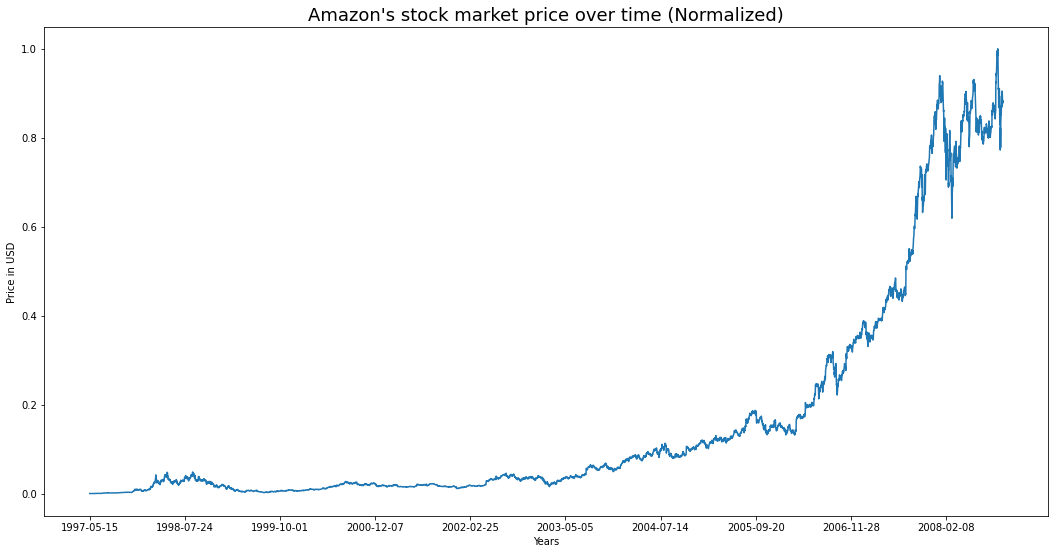

In [15]:
import matplotlib.dates as mdates

plt.figure(figsize = (18,9))
plt.plot(df_dates, df_close)

plt.xticks(np.arange(0,len(df),600), df['Date'][0:len(df):300])

plt.ylabel('Price in USD')
plt.xlabel('Years')
plt.title("Amazon's stock market price over time (Normalized)", fontsize = 18)

plt.show()

In [16]:
train_size = int(len(df_close) * 0.80)
test_size = len(df_close) - train_size
train = df_close[0:train_size,:]
test = df_close[train_size:len(df_close),:]
print(len(train), len(test))

4608 1152


In [0]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): #keep only similar value data if a data point is too far of the last one jump to the next value
	dataX, dataY = [], []       #put this in data x
	for i in range(len(dataset)-look_back-1): #let dataY have only output values
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

4606

In [0]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [20]:

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print ('compilation time : ', time.time() - start)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  if sys.path[0] == '':



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

compilation time :  0.028630971908569336


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [21]:
model.fit(
    trainX)__,
    trainY,
    batch_size=128,
    nb_epoch=40,
    validation_split=0.05)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 4375 samples, validate on 231 samples
Epoch 1/40
4375/4375 [==============================] - 1s 284us/step - loss: 0.0017 - mean_absolute_error: 0.0317 - val_loss: 0.0126 - val_mean_absolute_error: 0.1094
Epoch 2/40
4375/4375 [==============================] - 0s 59us/step - loss: 7.0391e-04 - mean_absolute_error: 0.0205 - val_loss: 0.0018 - val_mean_absolute_error: 0.0413
Epoch 3/40
4375/4375 [==============================] - 0s 57us/step - loss: 1.2011e-04 - mean_absolute_error: 0.0080 - val_loss: 8.9817e-05 - val_mean_absolute_error: 0.0087
Epoch 4/40
4375/4375 [==============================] - 0s 59us/step - loss: 6.7355e-05 - mean_absolute_error: 0.0064 - val_loss: 4.6942e-05 - val_mean_absolute_error: 0.0061
Epoch 5/40
4375/4375 [==============================] - 0s 54us/step - loss: 5.5913e-05 - mean_absolute_error: 0.0060 - val_loss: 2.4420e-04 - val_mean_absolute_error: 0

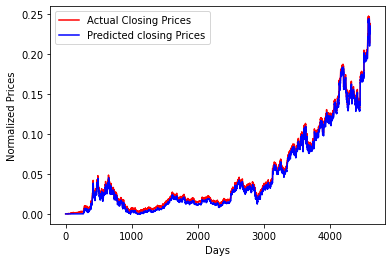

In [29]:

import matplotlib.pyplot as plt
predicted_stateful = model.predict(trainX)
plt.plot(trainY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalized Prices')
plt.legend(loc='best')
plt.show()

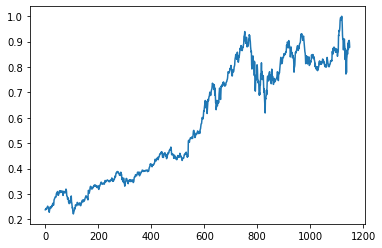

In [27]:
plt.plot(testX.flatten())

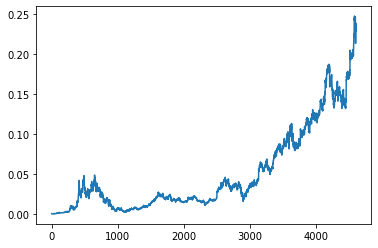

In [30]:
plt.plot(trainX.flatten())

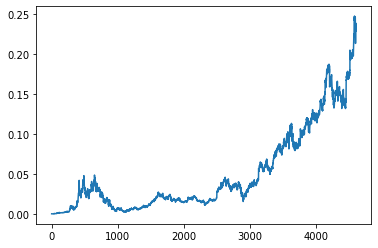

In [32]:
plt.plot(trainY.flatten())

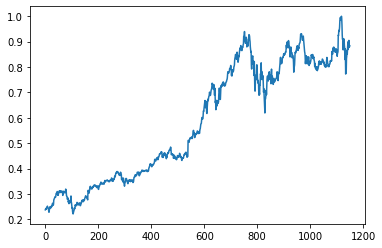

In [33]:
plt.plot(testY.flatten())

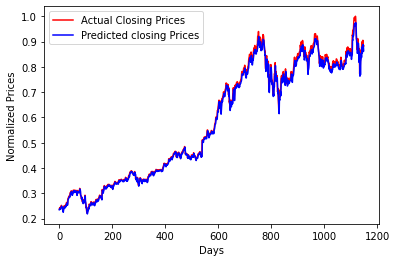

In [40]:

import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalized Prices')
plt.legend(loc='best')
plt.show()